In [1]:
import numpy as np
import pandas as pd
import json
import os
from scipy.integrate import simps

# from maiagomes.data import get_options_prices, prep_options_to_simulate_path
from maiagomes.models.allocate import get_kelly_c
from maiagomes.models.mmar.montecarlo import MMAR_simulator_handler
# from maiagomes.models.options.pricing import mmar_black_scholes_merton_paths

# from .utils import parse_arguments


In [2]:
import numpy as np

In [3]:
mmar_results=json.load(
        open(
          "../../../investing_poc/results/mining_with_mmar/latest_results.json",
            "rb",
        )
    )
cached_samples_folder = "../../../investing_poc/results/mining_with_mmar/simulations"
ticker_symbol = "GOOGL"
expiration_date = "2024-03-08"
min_thr = 390

In [4]:
minutes_until_expiration = 2000
simulator = MMAR_simulator_handler(
    mmar_results[ticker_symbol], T=minutes_until_expiration, 
)
simulator.prep()

100%|██████████| 1000/1000 [00:07<00:00, 130.38it/s]


In [10]:
simulator.simulator.save_MMAR("test.npy")

In [5]:
%run ../../src/maiagomes/models/options/pricing.py

In [4]:
from maiagomes.models.options.pricing import Option_pricing_simulator

 15%|█▍        | 149/1000 [00:18<01:44,  8.15it/s]


KeyboardInterrupt: 

In [7]:
ops = Option_pricing_simulator(simulator=simulator)

/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [20]:
ops.define(ticker_symbol='GOOGL', expiration_date="2024-03-15")

NameError: name 'option_chain15' is not defined

In [11]:
from maiagomes.data.utils import closest_friday, get_days_until_friday

In [15]:
days_until_friday = get_days_until_friday(weeks=1) - 1
expiration_date = closest_friday(days_until_friday=days_until_friday+1)

In [17]:
# days_until_friday
str(expiration_date)

'2024-03-08'

In [8]:
aa = ops.assess_all_contracts(showProgress=True)

  0%|          | 0/31 [00:00<?, ?it/s]/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:217: RuntimeWarning: divide by zero encountered in log
  np.log(S) + mat + np.log(norm.cdf(-d1))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:209: RuntimeWarning: divide by zero encountered in log
  call = np.exp(np.log(S) + mat + np.log(norm.cdf(d1))) - K * np.exp(
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:108: RuntimeWarning: divide by zero encountered in log
  option_mat = np.nan_to_num(np.log(option_mat) - np.log(option_mat[0, 0]))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:119: RuntimeWarning: divide by zero encountered in log
  mat=mat, log_return=np.log(x), min_thr=min_thr, call_mode=True, Teff=1.0
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/allocate.py:184: RuntimeWarning: divid

In [19]:
mat = np.load("../../results/simulated_paths/TSLA.npy")

In [23]:
mat = np.load("../../results/simulated_paths/BTC.npy")

In [24]:
mat

array([[ 0.        ,  0.        ,  0.01151489, ...,  0.        ,
         0.        ,  0.02503352],
       [ 0.        ,  0.        ,  0.01996342, ...,  0.        ,
         0.        ,  0.02629469],
       [-0.00497969,  0.        ,  0.04272107, ...,  0.        ,
         0.        ,  0.04904939],
       ...,
       [ 0.28942766, -0.02580673,  0.11469794, ..., -0.90877016,
        -1.13758131,  0.34797894],
       [ 0.2894277 , -0.02580722,  0.11469794, ..., -0.90877018,
        -1.13706979,  0.34797894],
       [ 0.25915548, -0.00967718,  0.14216584, ..., -0.9066897 ,
        -1.13151892,  0.34593027]])

In [ ]:
mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.00458672,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00750514,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.02939208,
         0.        ,  0.        ],
       ...,
       [ 0.2872405 , -0.78056558,  0.59404139, ...,  0.31220128,
         0.82449539, -0.2322214 ],
       [ 0.28724065, -0.78056557,  0.59404146, ...,  0.31220121,
         0.82449557, -0.2092977 ],
       [ 0.27225573, -0.79734484,  0.58960761, ...,  0.32865683,
         0.81460043, -0.18493201]])

In [110]:
_aa_ = pd.DataFrame(aa).T
# .plot(x = 'expected_return', y = 'kelly_c', kind = 'scatter')

In [114]:
_aa_ = _aa_.reset_index().rename(columns={'index':"contractSymbol"})

In [118]:
_aa_['direction'] = _aa_.contractSymbol.map(lambda a: 'strangle' if a.find("+") > 0 else 'put' if a.find("308P")>0 else 'call')

In [ ]:
ops.assess_contractrs(["GOOGL240308P00136000",""])

In [132]:
_aa_.head(33)

contractSymbol  expected_return  probability  \
0   GOOGL240308P00138000+GOOGL240308C00139000        13.532023     0.134644   
1                        GOOGL240308P00138000         0.186564     0.031860   
2                        GOOGL240308C00139000         0.184657     0.029175   
3   GOOGL240308P00137000+GOOGL240308C00140000        26.383016     0.264160   
4                        GOOGL240308P00137000         0.195567     0.048950   
5                        GOOGL240308C00140000         0.193125     0.053711   
6   GOOGL240308P00136000+GOOGL240308C00141000        53.993449     0.541748   
7                        GOOGL240308P00136000         0.767008     0.063354   
8                        GOOGL240308C00141000         3.271088     0.062744   
9   GOOGL240308P00135000+GOOGL240308C00142000        51.195028     0.513550   
10                       GOOGL240308P00135000         1.026611     0.032227   
11                       GOOGL240308C00142000         2.560033     0.053345   
12  GOOGL240308P00134000+GOOGL240308C00143000        99.044434     0.994507   
13                       GOOGL240308P00134000         8.227417     0.119141   
14                       GOOGL240308C00143000        17.847249     0.182007   
15  GOOGL240308P00133000+GOOGL240308C00144000        99.101008     0.995483   
16                       GOOGL240308P00133000        10.136175     0.118042   
17                       GOOGL240308C00144000        17.599487     0.186157   
18  GOOGL240308P00132000+GOOGL240308C00145000        96.142049     0.965454   
19                       GOOGL240308P00132000        10.240082     0.109497   
20                       GOOGL240308C00145000        16.269857     0.176270   
21  GOOGL240308P00131000+GOOGL240308C00146000        98.322673     0.985229   
22                       GOOGL240308P00131000        39.187917     0.406616   
23                       GOOGL240308C00146000        16.173299     0.171021   
24  GOOGL240308P00130000+GOOGL240308C00147000        98.580851     0.988281   
25                       GOOGL240308P00130000        39.805374     0.411133   
26                       GOOGL240308C00147000        49.827342     0.494141   
27  GOOGL240308P00129000+GOOGL240308C00148000        98.670329     0.989746   
28                       GOOGL240308P00129000        38.576019     0.392456   
29                       GOOGL240308C00148000        50.061157     0.495728   
30  GOOGL240308P00128000+GOOGL240308C00149000        98.717773     0.990845   
31                       GOOGL240308P00128000        38.135203     0.391113   
32                       GOOGL240308C00149000        49.559774     0.491943   

      kelly_c  exposure  cost direction  
0    0.065592  2.864330  3.31  strangle  
1         inf  1.587749  1.64       put  
2         inf  1.621278  1.67      call  
3    0.235171  1.758657  2.39  strangle  
4         inf  1.131749  1.19       put  
5         inf  1.135547  1.20      call  
6    0.533101  0.806523  1.76  strangle  
7         inf  0.805515  0.86       put  
8   -0.349946  0.843530  0.90      call  
9    0.503859  0.608063  1.25  strangle  
10 -36.334746  0.590342  0.61       put  
11  -0.553473  0.605859  0.64      call  
12   0.994451  0.004944  0.90  strangle  
13  -0.002737  0.387578  0.44       put  
14   0.133453  0.376277  0.46      call  
15   0.995437  0.002845  0.63  strangle  
16   0.021507  0.282227  0.32       put  
17   0.137129  0.252291  0.31      call  
18   0.965091  0.015546  0.45  strangle  
19   0.013123  0.213721  0.24       put  
20   0.122325  0.172983  0.21      call  
21   0.985078  0.004727  0.32  strangle  
22   0.391078  0.106809  0.18       put  
23   0.116386  0.116057  0.14      call  
24   0.988161  0.002695  0.23  strangle  
25   0.395958  0.076553  0.13       put  
26   0.483780  0.050586  0.10      call  
27   0.989641  0.001538  0.15  strangle  
28   0.376288  0.048604  0.08       put  
29   0.485449  0.035299  0.07      call  
30   0.990751  0.001190  0.13  strangle  


In [120]:
import plotly.express as px

In [128]:
px.scatter(_aa_.set_index('contractSymbol'), x = 'expected_return',y = 'kelly_c', color = 'direction')

/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'direction=strangle<br>expected_return=%{x}<br>kelly_c=%{y}<extra></extra>',
              'legendgroup': 'strangle',
              'marker': {'color': '#000001', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'strangle',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([13.53202311, 26.38301595, 53.99344889, 51.19502767, 99.04443359,
                          99.1010081 , 96.14204915, 98.32267253, 98.58085124, 98.67032878,
                          98.71777344, 98.74682617, 98.92871094, 98.85583496, 97.06426493,
                          97.21274312, 97.79650879, 98.05782064, 97.50565592, 95.17281596,
                          95.79003906, 88.93070475, 97.0427653 , 89.9529775 , 89.66446431]),
              'xaxis': 'x',
              'y': array([0.06559194, 0.2351707 , 0.53310071, 0.5038586 , 0.99445081, 0.99543736,
                          0.965091  , 0.98507772, 0.98816116, 0.98964111, 0.99075104, 0.99087438,
                          0.99284762, 0.9923543 , 0.96867138, 0.96891856, 0.97829367, 0.98174745,
                          0.97656631, 0.94818605, 0.95546772, 0.86925738, 0.96817794, 0.88248263,
                          0.87766394]),
              'yaxis': 'y'},
             {'hovertemplate': 'direction=put<br>expected_return=%{x}<br>kelly_c=%{y}<extra></extra>',
              'legendgroup': 'put',
              'marker': {'color': '#000002', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'put',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0.18656413,  0.19556681,  0.76700846,  1.02661133,  8.22741699,
                          10.13617452, 10.24008179, 39.18791707, 39.80537415, 38.57601929,
                          38.13520304, 33.5398763 , 32.7925415 , 31.98134867, 31.79749044,
                          74.47085571, 73.09749349, 64.61808268, 53.53900146, 26.81470744,
                           6.95678202,  0.67644755,  0.31148783,  0.23783366,  0.20673625]),
              'xaxis': 'x',
              'y': array([            inf,             inf,             inf, -3.63347459e+01,
                          -2.73685570e-03,  2.15072767e-02,  1.31231474e-02,  3.91077689e-01,
                           3.95957925e-01,  3.76287659e-01,  3.74716798e-01,  3.24840654e-01,
                           3.18449700e-01,  3.15133285e-01,  3.13871137e-01,  7.16283001e-01,
                           6.98017204e-01,  6.23941025e-01,  5.01803090e-01,  2.96899410e-01,
                           8.53159643e-02,             inf,             inf,             inf,
                                      inf]),
              'yaxis': 'y'},
             {'hovertemplate': 'direction=call<br>expected_return=%{x}<br>kelly_c=%{y}<extra></extra>',
              'legendgroup': 'call',
              'marker': {'color': '#000003', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'call',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0.18465678,  0.19312541,  3.27108765,  2.56003316, 17.84724935,
                          17.5994873 , 16.26985677, 16.17329915, 49.82734172, 50.06115723,
                          49.55977376, 48.78105164, 45.18696594, 42.31624349, 85.90633138,
                          86.58173116, 86.98180644, 86.50335185, 84.68633525, 82.11665853,
                          73.83858236, 68.54382324, 66.47806803, 64.21892802, 60.40088908,
                          51.41698201, 39.87993876, 29.4160614 , 21.28398641,  6.98937988]),
              'xaxis': 'x',
              'y': array([        inf,         inf, -0.34994617, -0.55347268,  0.13345332,
                           0.13712904,  0.12232466,  0.11638641,  0.48378046,  0.48544909,
                           0.48148086,  0.

In [106]:
adf= ops.option_chain_df.join(pd.DataFrame(aa).T, how ='outer')

In [109]:
adf

lastTradeDate  strike  lastPrice  bid  ask  \
GOOGL240308C00085000 2024-02-26 17:03:41+00:00    85.0      53.89  0.0  0.0   
GOOGL240308C00095000 2024-02-28 20:35:54+00:00    95.0      41.37  0.0  0.0   
GOOGL240308C00100000 2024-02-28 19:38:07+00:00   100.0      35.67  0.0  0.0   
GOOGL240308C00105000 2024-02-28 16:40:33+00:00   105.0      31.52  0.0  0.0   
GOOGL240308C00110000 2024-02-26 17:40:30+00:00   110.0      28.81  0.0  0.0   
...                                        ...     ...        ...  ...  ...   
GOOGL240308P00170000 2024-02-27 20:56:54+00:00   170.0      31.05  0.0  0.0   
GOOGL240308P00172500 2024-02-14 20:51:51+00:00   172.5      26.62  0.0  0.0   
GOOGL240308P00175000 2024-02-07 19:40:45+00:00   175.0      30.15  0.0  0.0   
GOOGL240308P00177500 2024-02-01 20:53:37+00:00   177.5      36.60  0.0  0.0   
GOOGL240308P00195000 2024-01-31 19:17:51+00:00   195.0      53.30  0.0  0.0   

                      change  percentChange  volume  openInterest  \
GOOGL240308C00085000     0.0            0.0     2.0           0.0   
GOOGL240308C00095000     0.0            0.0     1.0           0.0   
GOOGL240308C00100000     0.0            0.0     3.0           0.0   
GOOGL240308C00105000     0.0            0.0     1.0           0.0   
GOOGL240308C00110000     0.0            0.0     1.0           0.0   
...                      ...            ...     ...           ...   
GOOGL240308P00170000     0.0            0.0     3.0           0.0   
GOOGL240308P00172500     0.0            0.0     2.0           0.0   
GOOGL240308P00175000     0.0            0.0    49.0           0.0   
GOOGL240308P00177500     0.0            0.0     NaN           0.0   
GOOGL240308P00195000     0.0            0.0     NaN           0.0   

                      impliedVolatility  ... direction           S  \
GOOGL240308C00085000            0.00001  ...      call  138.460007   
GOOGL240308C00095000            0.00001  ...      call  138.460007   
GOOGL240308C00100000            0.00001  ...      call  138.460007   
GOOGL240308C00105000            0.00001  ...      call  138.460007   
GOOGL240308C00110000            0.00001  ...      call  138.460007   
...                                 ...  ...       ...         ...   
GOOGL240308P00170000            0.00001  ...       put  138.460007   
GOOGL240308P00172500            0.00001  ...       put  138.460007   
GOOGL240308P00175000            0.00001  ...       put  138.460007   
GOOGL240308P00177500            0.00001  ...       put  138.460007   
GOOGL240308P00195000            0.00001  ...       put  138.460007   

                     minutes_until_expiration strike_distance  rank  \
GOOGL240308C00085000                   8640.0       53.460007  22.0   
GOOGL240308C00095000                   8640.0       43.460007  21.0   
GOOGL240308C00100000                   8640.0       38.460007  20.0   
GOOGL240308C00105000                   8640.0       33.460007  19.0   
GOOGL240308C00110000                   8640.0       28.460007  18.0   
...                                       ...             ...   ...   
GOOGL240308P00170000                   8640.0       31.539993  19.0   
GOOGL240308P00172500                   8640.0       34.039993  20.0   
GOOGL240308P00175000                   8640.0       36.539993  21.0   
GOOGL240308P00177500                   8640.0       39.039993  22.0   
GOOGL240308P00195000                   8640.0       56.539993  23.0   

                      expected_return  probability  kelly_c  exposure  cost  
GOOGL240308C00085000              NaN          NaN      NaN       NaN   NaN  
GOOGL240308C00095000              NaN          NaN      NaN       NaN   NaN  
GOOGL240308C00100000              NaN          NaN      NaN       NaN   NaN  
GOOGL240308C00105000              NaN          NaN      NaN       NaN   NaN  
GOOGL240308C00110000              NaN          NaN      NaN       NaN   NaN  
...                               ...          ...      ...       ...   ...  
GOOGL240308P001

<Axes: xlabel='expected_return', ylabel='strike_distance'>

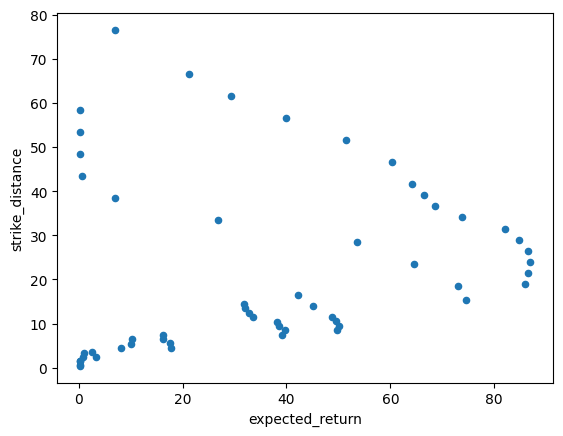

In [108]:
adf.plot(x = 'expected_return', y = 'strike_distance',kind = 'scatter')

In [71]:
ops.assess_contractrs(ops.get_k_distance_contract(3))

/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:124: RuntimeWarning: divide by zero encountered in log
  np.log(S) + mat + np.log(norm.cdf(-d1))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:116: RuntimeWarning: divide by zero encountered in log
  call = np.exp(np.log(S) + mat + np.log(norm.cdf(d1))) - K * np.exp(
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:107: RuntimeWarning: divide by zero encountered in log
  option_mat = np.nan_to_num(np.log(option_mat) - np.log(option_mat[0, 0]))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:118: RuntimeWarning: divide by zero encountered in log
  mat=mat, log_return=np.log(x), min_thr=min_thr, call_mode=True, Teff=1.0
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:124: RuntimeWarning: divide by zero encountered in log
  

{'GOOGL240308P00136000+GOOGL240308C00141000': {'expected_return': 53.993448893229164,
  'probability': 0.541748046875,
  'kelly_c': 0.5331007147481878,
  'exposure': 0.8065234375},
 'GOOGL240308P00136000': {'expected_return': 53.993448893229164,
  'probability': 0.541748046875,
  'kelly_c': 0.5331007147481878,
  'exposure': 0.8065234375},
 'GOOGL240308C00141000': {'expected_return': 53.993448893229164,
  'probability': 0.541748046875,
  'kelly_c': 0.5331007147481878,
  'exposure': 0.8065234375}}

In [50]:
ops.get_k_distance_contract(3,inTheMoney=False)

['GOOGL240308P00136000', 'GOOGL240308C00141000']

In [34]:
df = ops.option_chain_df.copy()

In [35]:
df

lastTradeDate  strike  lastPrice  bid  ask  \
contractSymbol                                                                
GOOGL240308P00138000 2024-02-29 20:59:58+00:00   138.0       1.64  0.0  0.0   
GOOGL240308C00139000 2024-02-29 20:59:52+00:00   139.0       1.67  0.0  0.0   
GOOGL240308P00137000 2024-02-29 20:58:39+00:00   137.0       1.19  0.0  0.0   
GOOGL240308C00140000 2024-02-29 20:59:59+00:00   140.0       1.20  0.0  0.0   
GOOGL240308P00136000 2024-02-29 20:59:31+00:00   136.0       0.86  0.0  0.0   
...                                        ...     ...        ...  ...  ...   
GOOGL240308C00100000 2024-02-28 19:38:07+00:00   100.0      35.67  0.0  0.0   
GOOGL240308P00177500 2024-02-01 20:53:37+00:00   177.5      36.60  0.0  0.0   
GOOGL240308C00095000 2024-02-28 20:35:54+00:00    95.0      41.37  0.0  0.0   
GOOGL240308C00085000 2024-02-26 17:03:41+00:00    85.0      53.89  0.0  0.0   
GOOGL240308P00195000 2024-01-31 19:17:51+00:00   195.0      53.30  0.0  0.0   

                      change  percentChange  volume  openInterest  \
contractSymbol                                                      
GOOGL240308P00138000     0.0            0.0  1146.0             0   
GOOGL240308C00139000     0.0            0.0  2833.0             0   
GOOGL240308P00137000     0.0            0.0  2929.0             0   
GOOGL240308C00140000     0.0            0.0  5363.0             0   
GOOGL240308P00136000     0.0            0.0   867.0             0   
...                      ...            ...     ...           ...   
GOOGL240308C00100000     0.0            0.0     3.0             0   
GOOGL240308P00177500     0.0            0.0     NaN             0   
GOOGL240308C00095000     0.0            0.0     1.0             0   
GOOGL240308C00085000     0.0            0.0     2.0             0   
GOOGL240308P00195000     0.0            0.0     NaN             0   

                      impliedVolatility  inTheMoney contractSize currency  \
contractSymbol                                                              
GOOGL240308P00138000           0.007822       False      REGULAR      USD   
GOOGL240308C00139000           0.007822       False      REGULAR      USD   
GOOGL240308P00137000           0.015635       False      REGULAR      USD   
GOOGL240308C00140000           0.015635       False      REGULAR      USD   
GOOGL240308P00136000           0.031260       False      REGULAR      USD   
...                                 ...         ...          ...      ...   
GOOGL240308C00100000           0.000010        True      REGULAR      USD   
GOOGL240308P00177500           0.000010        True      REGULAR      USD   
GOOGL240308C00095000           0.000010        True      REGULAR      USD   
GOOGL240308C00085000           0.000010        True      REGULAR      USD   
GOOGL240308P00195000           0.000010        True      REGULAR      USD   

                     direction           S  minutes_until_expiration  \
contractSymbol                                                         
GOOGL240308P00138000       put  138.460007                      8640   
GOOGL240308C00139000      call  138.460007                      8640   
GOOGL240308P00137000       put  138.460007                      8640   
GOOGL240308C00140000      call  138.460007                      8640   
GOOGL240308P00136000       put  138.460007                      8640   
...                        ...         ...                       ...   
GOOGL240308C00100000      call  138.460007                      8640   
GOOGL240308P00177500       put  138.460007                      8640   
GOOGL240308C00095000      call  138.460007                      8640   
GOOGL240308C00085000      call  138.460007                      8640   
GOOGL240308P00195000       put  138.460007                      8640   

                      strike_distance  
contractSymbol                         
GOOGL240308P00138000         0.460007  
GOOGL240308C00139000         0.539993  
GOOGL240

In [37]:
df['rank'] = df.groupby(["inTheMoney","direction"]).strike_distance.transform('rank')

['GOOGL240308C00138000', 'GOOGL240308P00139000']

In [39]:
df.sort_values(by='rank').set_index()

TypeError: DataFrame.set_index() missing 1 required positional argument: 'keys'

In [17]:
ops.option_chain_df

lastTradeDate  strike  lastPrice  bid  ask  \
contractSymbol                                                                
GOOGL240308P00138000 2024-02-29 20:59:58+00:00   138.0       1.64  0.0  0.0   
GOOGL240308C00139000 2024-02-29 20:59:52+00:00   139.0       1.67  0.0  0.0   
GOOGL240308P00137000 2024-02-29 20:58:39+00:00   137.0       1.19  0.0  0.0   
GOOGL240308C00140000 2024-02-29 20:59:59+00:00   140.0       1.20  0.0  0.0   
GOOGL240308P00136000 2024-02-29 20:59:31+00:00   136.0       0.86  0.0  0.0   
...                                        ...     ...        ...  ...  ...   
GOOGL240308C00100000 2024-02-28 19:38:07+00:00   100.0      35.67  0.0  0.0   
GOOGL240308P00177500 2024-02-01 20:53:37+00:00   177.5      36.60  0.0  0.0   
GOOGL240308C00095000 2024-02-28 20:35:54+00:00    95.0      41.37  0.0  0.0   
GOOGL240308C00085000 2024-02-26 17:03:41+00:00    85.0      53.89  0.0  0.0   
GOOGL240308P00195000 2024-01-31 19:17:51+00:00   195.0      53.30  0.0  0.0   

                      change  percentChange  volume  openInterest  \
contractSymbol                                                      
GOOGL240308P00138000     0.0            0.0  1146.0             0   
GOOGL240308C00139000     0.0            0.0  2833.0             0   
GOOGL240308P00137000     0.0            0.0  2929.0             0   
GOOGL240308C00140000     0.0            0.0  5363.0             0   
GOOGL240308P00136000     0.0            0.0   867.0             0   
...                      ...            ...     ...           ...   
GOOGL240308C00100000     0.0            0.0     3.0             0   
GOOGL240308P00177500     0.0            0.0     NaN             0   
GOOGL240308C00095000     0.0            0.0     1.0             0   
GOOGL240308C00085000     0.0            0.0     2.0             0   
GOOGL240308P00195000     0.0            0.0     NaN             0   

                      impliedVolatility  inTheMoney contractSize currency  \
contractSymbol                                                              
GOOGL240308P00138000           0.007822       False      REGULAR      USD   
GOOGL240308C00139000           0.007822       False      REGULAR      USD   
GOOGL240308P00137000           0.015635       False      REGULAR      USD   
GOOGL240308C00140000           0.015635       False      REGULAR      USD   
GOOGL240308P00136000           0.031260       False      REGULAR      USD   
...                                 ...         ...          ...      ...   
GOOGL240308C00100000           0.000010        True      REGULAR      USD   
GOOGL240308P00177500           0.000010        True      REGULAR      USD   
GOOGL240308C00095000           0.000010        True      REGULAR      USD   
GOOGL240308C00085000           0.000010        True      REGULAR      USD   
GOOGL240308P00195000           0.000010        True      REGULAR      USD   

                     direction           S  minutes_until_expiration  \
contractSymbol                                                         
GOOGL240308P00138000       put  138.460007                      8640   
GOOGL240308C00139000      call  138.460007                      8640   
GOOGL240308P00137000       put  138.460007                      8640   
GOOGL240308C00140000      call  138.460007                      8640   
GOOGL240308P00136000       put  138.460007                      8640   
...                        ...         ...                       ...   
GOOGL240308C00100000      call  138.460007                      8640   
GOOGL240308P00177500       put  138.460007                      8640   
GOOGL240308C00095000      call  138.460007                      8640   
GOOGL240308C00085000      call  138.460007                      8640   
GOOGL240308P00195000       put  138.460007                      8640   

                      strike_distance  rank  
contractSymbol                               
GOOGL240308P00138000         0.460007   1.0  
GOOGL240308C00139000         0

In [28]:

option_chain = get_options_prices(
    ticker_symbol=ticker_symbol, expiration_date=expiration_date
).set_index("contractSymbol")
option_chain["minutes_until_expiration"] = minutes_until_expiration



/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [56]:
option_chain

lastTradeDate  strike  lastPrice  bid   ask  \
contractSymbol                                                                 
GOOGL240308P00080000 2024-02-21 14:46:04+00:00    80.0       0.01  0.0  0.01   
GOOGL240308P00085000 2024-02-02 19:58:54+00:00    85.0       0.02  0.0  0.01   
GOOGL240308P00090000 2024-02-06 15:17:06+00:00    90.0       0.01  0.0  0.01   
GOOGL240308P00095000 2024-01-30 18:50:12+00:00    95.0       0.07  0.0  0.01   
GOOGL240308P00100000 2024-02-26 19:56:17+00:00   100.0       0.01  0.0  0.01   
...                                        ...     ...        ...  ...   ...   
GOOGL240308C00190000 2024-02-09 16:09:54+00:00   190.0       0.03  0.0  0.00   
GOOGL240308C00195000 2024-02-12 20:02:17+00:00   195.0       0.02  0.0  0.01   
GOOGL240308C00200000 2024-02-09 17:23:10+00:00   200.0       0.01  0.0  0.01   
GOOGL240308C00205000 2024-02-26 18:56:19+00:00   205.0       0.01  0.0  0.01   
GOOGL240308C00215000 2024-01-31 14:29:59+00:00   215.0       0.08  0.0  0.01   

                      change  percentChange  volume  openInterest  \
contractSymbol                                                      
GOOGL240308P00080000     0.0            0.0     1.0             3   
GOOGL240308P00085000     0.0            0.0     2.0             2   
GOOGL240308P00090000     0.0            0.0     6.0             8   
GOOGL240308P00095000     0.0            0.0     NaN            32   
GOOGL240308P00100000     0.0            0.0    24.0            18   
...                      ...            ...     ...           ...   
GOOGL240308C00190000     0.0            0.0   200.0           202   
GOOGL240308C00195000     0.0            0.0     4.0           205   
GOOGL240308C00200000     0.0            0.0     2.0            21   
GOOGL240308C00205000     0.0            0.0    11.0            13   
GOOGL240308C00215000     0.0            0.0     NaN             2   

                      impliedVolatility  inTheMoney contractSize currency  \
contractSymbol                                                              
GOOGL240308P00080000           1.125004       False      REGULAR      USD   
GOOGL240308P00085000           1.000005       False      REGULAR      USD   
GOOGL240308P00090000           0.906251       False      REGULAR      USD   
GOOGL240308P00095000           0.781252       False      REGULAR      USD   
GOOGL240308P00100000           0.687503       False      REGULAR      USD   
...                                 ...         ...          ...      ...   
GOOGL240308C00190000           0.500005       False      REGULAR      USD   
GOOGL240308C00195000           0.703128       False      REGULAR      USD   
GOOGL240308C00200000           0.750003       False      REGULAR      USD   
GOOGL240308C00205000           0.796877       False      REGULAR      USD   
GOOGL240308C00215000           0.875001       False      REGULAR      USD   

                     direction           S  minutes_until_expiration  
contractSymbol                                                        
GOOGL240308P00080000       put  138.460007                      8191  
GOOGL240308P00085000       put  138.460007                      8191  
GOOGL240308P00090000       put  138.460007                      8191  
GOOGL240308P00095000       put  138.460007                      8191  
GOOGL240308P00100000       put  138.460007                      8191  
...                        ...         ...                       ...  
GOOGL240308C00190000      call  138.460007                      8191  
GOOGL240308C00195000      call  138.460007                      8191  
GOOGL240308C00200000      call  138.460007                      8191  
GOOGL240308C00205000      call  138.460007                      8191  
GOOGL240308C00215000      call  138.460007                      8191  

[100 rows x 16 columns]

In [75]:
assess_option_strategy(simulator=simulator, option_chain.loc[["GOOGL240308C00215000"]].reset_index())
# .rename(columns={"index":"contractSymbol"})

TypeError: assess_option_strategy() missing 1 required positional argument: 'option_contracts'

In [65]:
_option_chain_

contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0  GOOGL240308P00080000 2024-02-21 14:46:04+00:00    80.0       0.01  0.0   

    ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  0.01     0.0            0.0     1.0             3           1.125004   

   inTheMoney contractSize currency direction           S  \
0       False      REGULAR      USD       put  138.460007   

   minutes_until_expiration  
0                      8191

In [66]:
options = prep_options_to_simulate_path(_option_chain_)

In [67]:
options

{'GOOGL240308P00080000': {'K': 80.0,
  'sigma': 1.125004375,
  'direction': 'put',
  'S': 138.4600067138672,
  'minutes_until_expiration': 8191}}

/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:110: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S) + mat - np.log(K) + T_years * (r + 0.5 * sigma**2)) / (
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:124: RuntimeWarning: divide by zero encountered in log
  np.log(S) + mat + np.log(norm.cdf(-d1))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:66: RuntimeWarning: divide by zero encountered in log
  option_mat = np.nan_to_num(np.log(option_mat) - np.log(option_mat[0, 0]))
/var/folders/93/g3mybg_57p16jzvjbpkk1jlw0000gn/T/ipykernel_66113/2970766931.py:7: RuntimeWarning: divide by zero encountered in log
  mat=mat, log_return=np.log(x), min_thr=min_thr, call_mode=True, Teff=1.0
/var/folders/93/g3mybg_57p16jzvjbpkk1jlw0000gn/T/ipykernel_66113/2970766931.py:13: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'sci

In [72]:
expected_return

0.1948431396484375

0.3589593017556715

In [ ]:
ans = (
    pd.DataFrame({"Probability": probs})
    .reset_index()
    .rename(columns={"index": "return"})
)
ans["kelly_c"] = ans.apply(
    lambda a: get_kelly_c(p=a["Probability"], b=a["return"] - 1), axis=1
)

ans["Exposure"] = ans.apply(lambda a: (1 - a["Probability"]) * lastPrice, axis=1)

In [ ]:


# f"../investing_poc/results/mining_with_mmar/simulations/{ticker_symbol}.csv.gz"
def get_exposure_surival_data_per_ticker(mmar_results, ticker_symbol, samples_loc):
samples = pd.read_csv(
    samples_loc,
    compression="gzip",
)
samples["variable"] = "mmar"
samples = samples.set_index("variable")
minutes_until_expiration = samples["t"].max()
simulator = MMAR_simulator_handler(
    mmar_results[ticker_symbol], T=minutes_until_expiration, samples=samples
)
simulator.prep()
option_chain = get_options_prices(
    ticker_symbol=ticker_symbol, expiration_date=expiration_date
)
option_chain["minutes_until_expiration"] = minutes_until_expiration

options = prep_options_to_simulate_path(option_chain.reset_index())

    mat = mmar_black_scholes_merton_paths(simulator=simulator, options=options)

    probs = {
        x: simulator.get_path_probability(
            mat=mat, log_return=np.log(x), min_thr=420, call_mode=True, Teff=1.0
        )
        for x in np.arange(0.1, 100, 0.1)
    }
    ans = (
        pd.DataFrame({"Probability": probs})
        .reset_index()
        .rename(columns={"index": "return"})
    )
    ans["kelly_c"] = ans.apply(
        lambda a: get_kelly_c(p=a["Probability"], b=a["return"] - 1), axis=1
    )

    ans["Exposure"] = ans.apply(lambda a: (1 - a["Probability"]) * lastPrice, axis=1)

    return ans
